CODE BLOCK: 1

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
from tqdm import tqdm
!pip install torchsummary

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Mounting the google drive and setting the path. These two lines of code is added extra

In [2]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [3]:
%cd /content/gdrive/My\Drive/Assignment_5

/content/gdrive/MyDrive/Assignment_5


CODE BLOCK: 2

In [4]:
cuda = torch.cuda.is_available()
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')# This line is added to make sure the device name is set as cuda

### Importing modules from utils.py and model.py files

In [6]:
from utils import GetCorrectPredCount,train,test,download_data,create_accuracy_loss_plot,generate_model_parameters
from model import Net

CODE BLOCK: 3

In [7]:
# Train data transformations
train_transforms = transforms.Compose([
    transforms.RandomApply([transforms.CenterCrop(22), ], p=0.1),
    transforms.Resize((28, 28)),
    transforms.RandomRotation((-15., 15.), fill=0),
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,)),
    ])

# Test data transformations
test_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
    ])

CODE BLOCK: 4

In [9]:
train_data,test_data=download_data(train_transforms,test_transforms)

CODE BLOCK: 5

In [10]:
batch_size = 512

kwargs = {'batch_size': batch_size, 'shuffle': True, 'num_workers': 2, 'pin_memory': True}

train_loader = torch.utils.data.DataLoader(train_data, **kwargs)
test_loader = torch.utils.data.DataLoader(test_data, **kwargs)

CODE BLOCK: 6

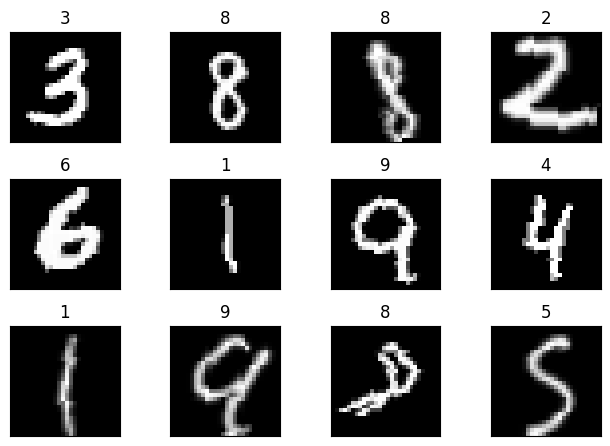

In [11]:
import matplotlib.pyplot as plt

batch_data, batch_label = next(iter(train_loader)) 

fig = plt.figure()

for i in range(12):
  plt.subplot(3,4,i+1)
  plt.tight_layout()
  plt.imshow(batch_data[i].squeeze(0), cmap='gray')
  plt.title(batch_label[i].item())
  plt.xticks([])
  plt.yticks([])

CODE BLOCK: 10

In [12]:
model = Net().to(device)
optimizer = optim.SGD(model.parameters(), lr=1.00e-03, momentum=0.9)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=15, gamma=0.1, verbose=True)
num_epochs = 20

for epoch in range(1, num_epochs+1):
  print(f'Epoch {epoch}')
  train_acc,train_losses=train(model, device, train_loader, optimizer)
  test_acc,test_losses=test(model, device, test_loader)
  scheduler.step()
     

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 1


Train: Loss=2.2536 Batch_id=117 Accuracy=16.24: 100%|██████████| 118/118 [00:32<00:00,  3.63it/s]


Test set: Average loss: 2.2550, Accuracy: 2963/10000 (29.63%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 2


Train: Loss=0.9815 Batch_id=117 Accuracy=53.93: 100%|██████████| 118/118 [00:23<00:00,  4.96it/s]


Test set: Average loss: 0.9555, Accuracy: 7682/10000 (76.82%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 3


Train: Loss=0.5418 Batch_id=117 Accuracy=81.56: 100%|██████████| 118/118 [00:23<00:00,  5.12it/s]


Test set: Average loss: 0.3916, Accuracy: 8809/10000 (88.09%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 4


Train: Loss=0.4500 Batch_id=117 Accuracy=87.24: 100%|██████████| 118/118 [00:23<00:00,  5.05it/s]


Test set: Average loss: 0.2959, Accuracy: 9098/10000 (90.98%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 5


Train: Loss=0.2902 Batch_id=117 Accuracy=90.22: 100%|██████████| 118/118 [00:24<00:00,  4.79it/s]


Test set: Average loss: 0.2209, Accuracy: 9347/10000 (93.47%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 6


Train: Loss=0.2718 Batch_id=117 Accuracy=91.91: 100%|██████████| 118/118 [00:24<00:00,  4.77it/s]


Test set: Average loss: 0.1792, Accuracy: 9459/10000 (94.59%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 7


Train: Loss=0.2328 Batch_id=117 Accuracy=93.21: 100%|██████████| 118/118 [00:24<00:00,  4.79it/s]


Test set: Average loss: 0.1415, Accuracy: 9573/10000 (95.73%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 8


Train: Loss=0.1246 Batch_id=117 Accuracy=94.16: 100%|██████████| 118/118 [00:24<00:00,  4.79it/s]


Test set: Average loss: 0.1236, Accuracy: 9628/10000 (96.28%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 9


Train: Loss=0.1252 Batch_id=117 Accuracy=94.82: 100%|██████████| 118/118 [00:24<00:00,  4.91it/s]


Test set: Average loss: 0.1082, Accuracy: 9662/10000 (96.62%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 10


Train: Loss=0.0895 Batch_id=117 Accuracy=95.25: 100%|██████████| 118/118 [00:23<00:00,  5.08it/s]


Test set: Average loss: 0.0943, Accuracy: 9719/10000 (97.19%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 11


Train: Loss=0.1735 Batch_id=117 Accuracy=95.75: 100%|██████████| 118/118 [00:23<00:00,  4.99it/s]


Test set: Average loss: 0.1049, Accuracy: 9646/10000 (96.46%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 12


Train: Loss=0.1577 Batch_id=117 Accuracy=95.91: 100%|██████████| 118/118 [00:24<00:00,  4.79it/s]


Test set: Average loss: 0.0832, Accuracy: 9741/10000 (97.41%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 13


Train: Loss=0.0927 Batch_id=117 Accuracy=96.20: 100%|██████████| 118/118 [00:24<00:00,  4.76it/s]


Test set: Average loss: 0.0761, Accuracy: 9762/10000 (97.62%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 14


Train: Loss=0.1410 Batch_id=117 Accuracy=96.46: 100%|██████████| 118/118 [00:24<00:00,  4.81it/s]


Test set: Average loss: 0.0721, Accuracy: 9772/10000 (97.72%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 15


Train: Loss=0.1429 Batch_id=117 Accuracy=96.63: 100%|██████████| 118/118 [00:23<00:00,  4.95it/s]


Test set: Average loss: 0.0667, Accuracy: 9794/10000 (97.94%)

Adjusting learning rate of group 0 to 1.0000e-04.
Epoch 16


Train: Loss=0.1535 Batch_id=117 Accuracy=96.99: 100%|██████████| 118/118 [00:23<00:00,  5.12it/s]


Test set: Average loss: 0.0630, Accuracy: 9806/10000 (98.06%)

Adjusting learning rate of group 0 to 1.0000e-04.
Epoch 17


Train: Loss=0.0231 Batch_id=117 Accuracy=97.11: 100%|██████████| 118/118 [00:23<00:00,  5.04it/s]


Test set: Average loss: 0.0636, Accuracy: 9807/10000 (98.07%)

Adjusting learning rate of group 0 to 1.0000e-04.
Epoch 18


Train: Loss=0.1068 Batch_id=117 Accuracy=97.09: 100%|██████████| 118/118 [00:24<00:00,  4.80it/s]


Test set: Average loss: 0.0625, Accuracy: 9809/10000 (98.09%)

Adjusting learning rate of group 0 to 1.0000e-04.
Epoch 19


Train: Loss=0.0467 Batch_id=117 Accuracy=97.05: 100%|██████████| 118/118 [00:24<00:00,  4.78it/s]


Test set: Average loss: 0.0621, Accuracy: 9813/10000 (98.13%)

Adjusting learning rate of group 0 to 1.0000e-04.
Epoch 20


Train: Loss=0.1235 Batch_id=117 Accuracy=97.03: 100%|██████████| 118/118 [00:24<00:00,  4.75it/s]


Test set: Average loss: 0.0618, Accuracy: 9814/10000 (98.14%)

Adjusting learning rate of group 0 to 1.0000e-04.


CODE BLOCK: 11

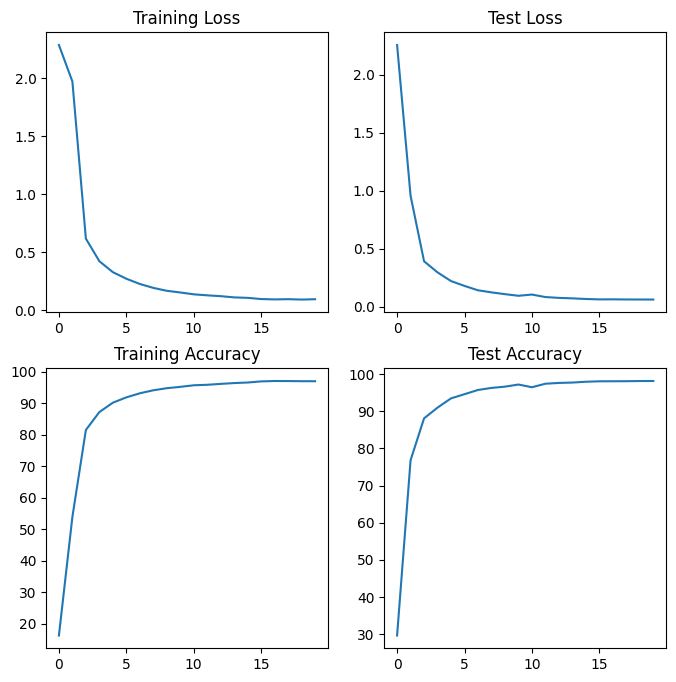

In [13]:
create_accuracy_loss_plot(train_losses,train_acc,test_losses,test_acc).plot_accuray_loss()

#Print model architecture and parameters

In [14]:
generate_model_parameters(28).generate_params(Net)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 26, 26]             320
            Conv2d-2           [-1, 64, 24, 24]          18,496
            Conv2d-3          [-1, 128, 10, 10]          73,856
            Conv2d-4            [-1, 256, 8, 8]         295,168
            Linear-5                   [-1, 50]         204,850
            Linear-6                   [-1, 10]             510
Total params: 593,200
Trainable params: 593,200
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.67
Params size (MB): 2.26
Estimated Total Size (MB): 2.94
----------------------------------------------------------------
